# Tutorial 3: Slide-seqV2 mouse olfactory bulb
### This tutorial demonstrates how to identify spatial domains on Slide-seqV2 data.

## Data:
1. (Puck_200127_15 from https://singlecell.broadinstitute.org/single_cell/study/SCP815/highly-sensitive-spatial-transcriptomics-at-near-cellular-resolution-with-slide-seqv2#study-summary).
2. https://drive.google.com/drive/folders/10lhz5VY7YfvHrtV40MwaqLmWz56U9eBP?usp=sharing.

## Installing and Importing STAGATE 

In [1]:
!cd STAGATE

In [2]:
!python setup.py build

running build
running build_py
copying STAGATE\Train_STAGATE.py -> build\lib\STAGATE
running egg_info
writing STAGATE.egg-info\PKG-INFO
writing dependency_links to STAGATE.egg-info\dependency_links.txt
writing requirements to STAGATE.egg-info\requires.txt
writing top-level names to STAGATE.egg-info\top_level.txt
reading manifest file 'STAGATE.egg-info\SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'STAGATE.egg-info\SOURCES.txt'


In [3]:
!python setup.py install

running install
running bdist_egg
running egg_info
writing STAGATE.egg-info\PKG-INFO
writing dependency_links to STAGATE.egg-info\dependency_links.txt
writing requirements to STAGATE.egg-info\requires.txt
writing top-level names to STAGATE.egg-info\top_level.txt
reading manifest file 'STAGATE.egg-info\SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'STAGATE.egg-info\SOURCES.txt'
installing library code to build\bdist.win-amd64\egg
running install_lib
running build_py
creating build\bdist.win-amd64\egg
creating build\bdist.win-amd64\egg\STAGATE
copying build\lib\STAGATE\model.py -> build\bdist.win-amd64\egg\STAGATE
copying build\lib\STAGATE\STAGATE.py -> build\bdist.win-amd64\egg\STAGATE
copying build\lib\STAGATE\Train_STAGATE.py -> build\bdist.win-amd64\egg\STAGATE
copying build\lib\STAGATE\utils.py -> build\bdist.win-amd64\egg\STAGATE
copying build\lib\STAGATE\__init__.py -> build\bdist.win-amd64\egg\STAGATE
byte-compiling build\bdist.win-amd64\egg\STAGATE\model.py to

c:\Users\KARAN\anaconda3\envs\STAGATE_PT\lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
c:\Users\KARAN\anaconda3\envs\STAGATE_PT\lib\site-packages\setuptools\command\easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(


In [4]:
import STAGATE

In [5]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import os
import sys

## Preparation

In [6]:
input_dir = 'Data3'
counts_file = os.path.join(input_dir, 'Puck_200127_15.digital_expression.txt')
coor_file = os.path.join(input_dir, 'Puck_200127_15_bead_locations.xlsx')


In [7]:
counts_file

'Data3\\Puck_200127_15.digital_expression.txt'

In [8]:
counts = pd.read_csv(counts_file, sep='\t', index_col=0)

In [9]:
print(counts.shape)

(21220, 21724)


In [10]:
coor_df = pd.read_excel(coor_file, index_col=0)
print(coor_df.shape)


(21724, 2)


In [11]:
counts

,TTTTTTTTTTTTTT,GCTAGGATTGTAAA,CACAACAACGTTGG,AATGACGGCAATGC,TATTTTAGATCTCA,CGCTAACGTCCTTA,TTCCCCGCTATCCT,TGATGGAAAAAGTC,ATCCCAAAATAATT,ATCGCTATGCTTTA,...,TCCAGTCGACGGGG,AACCAGTCCCCTAA,GGGAATAAAACCGA,TAACATCATTCCTA,TCGACAGGTGGAGG,GCCGCCCGTTGGCT,ACAATAAGGGTCCT,TCTTCACTATCGCT,AAGAATTACTAAGC,AATCCACATCTTAT
GENE,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,3,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
0610009B22Rik,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610009E02Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610009L18Rik,1,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mt-Tv,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
n-R5-8s1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
n-R5s29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
coor_df


,xcoord,ycoord
barcode,,
TTTTTTTTTTTTTT,10.298,3031.2
GCTAGGATTGTAAA,3352.500,2498.0
CACAACAACGTTGG,3687.400,4701.0
AATGACGGCAATGC,2706.900,2504.5
TATTTTAGATCTCA,2786.800,3984.3
...,...,...
GCCGCCCGTTGGCT,3368.200,5458.2
ACAATAAGGGTCCT,4522.000,2138.6
TCTTCACTATCGCT,3968.500,3858.4


In [13]:
#coor_df.drop(['barcode'],axis=1,inplace=True)

In [14]:
print(counts.shape, coor_df.shape)

(21220, 21724) (21724, 2)


In [15]:
adata = sc.AnnData(counts.T)
adata.var_names_make_unique()

In [16]:
coor_df = coor_df.loc[adata.obs_names, ['xcoord', 'ycoord']]
adata.obsm["spatial"] = coor_df.to_numpy()

In [17]:
sc.pp.calculate_qc_metrics(adata, inplace=True)


In [18]:
adata


AnnData object with n_obs × n_vars = 21724 × 21220
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'spatial'

(-289.81710000000004, 6312.7151, 173.30850000000004, 5709.8615)

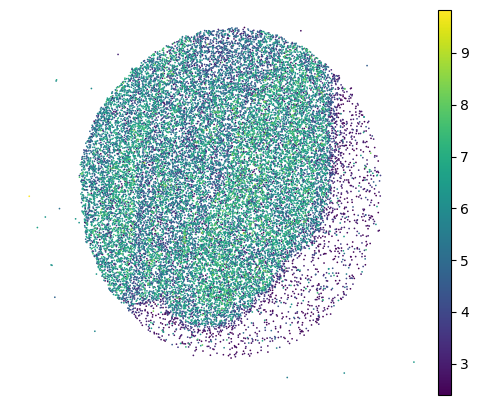

In [19]:
plt.rcParams["figure.figsize"] = (6,5)
sc.pl.embedding(adata, basis="spatial", color="log1p_total_counts",s=6, show=False)
plt.title('')
plt.axis('off')

In [20]:
# can be downloaded from https://drive.google.com/drive/folders/10lhz5VY7YfvHrtV40MwaqLmWz56U9eBP?usp=sharing
used_barcode = pd.read_csv('Data3/used_barcodes.txt', sep='\t', header=None)
used_barcode = used_barcode[0]

In [21]:
adata = adata[used_barcode,]

(588.545, 5108.555, 847.6700000000001, 5670.73)

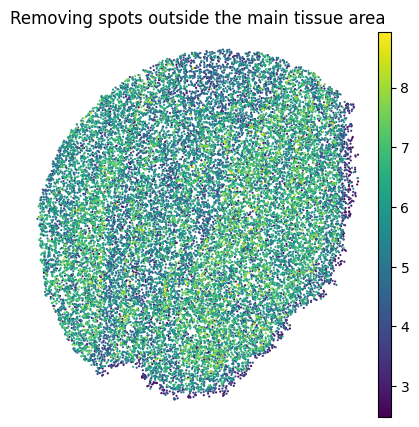

In [22]:
plt.rcParams["figure.figsize"] = (5,5)
sc.pl.embedding(adata, basis="spatial", color="log1p_total_counts",s=10, show=False, title='Removing spots outside the main tissue area')

plt.axis('off')

In [23]:
sc.pp.filter_genes(adata, min_cells=50)
print('After flitering: ', adata.shape)

c:\Users\KARAN\anaconda3\envs\STAGATE_PT\lib\site-packages\scanpy\preprocessing\_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


After flitering:  (20139, 11750)


In [24]:
#Normalization
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

## Constructing the spatial network


------Calculating spatial graph...
The graph contains 228300 edges, 20139 cells.
11.3362 neighbors per cell on average.


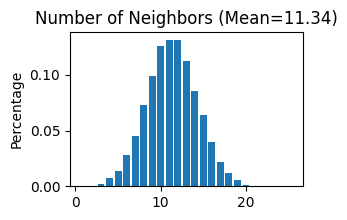

In [25]:
STAGATE.Cal_Spatial_Net(adata, rad_cutoff=50)
STAGATE.Stats_Spatial_Net(adata)

## Running STAGATE

In [26]:
%cd STAGATE

c:\Users\KARAN\Desktop\STAGATE-main\STAGATE


In [27]:
from STAGATE import train_STAGATE

In [30]:
import tensorflow as tf

In [31]:
tf.compat.v1.disable_eager_execution()

In [32]:
adata = train_STAGATE(adata)

Size of Input:  (20139, 3000)


100%|██████████| 500/500 [26:23<00:00,  3.17s/it]


In [34]:
sc.pp.neighbors(adata, use_rep='STAGATE')
sc.tl.umap(adata)

C:\Users\KARAN\AppData\Roaming\Python\Python39\site-packages\umap\distances.py:1053: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\KARAN\AppData\Roaming\Python\Python39\site-packages\umap\distances.py:1061: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\KARAN\AppData\Roaming\Python\Python39\site-packages\umap\distances.

In [38]:
!pip install louvain --user

     ---------------------------------------- 89.1/89.1 kB 1.7 MB/s eta 0:00:00


In [39]:
sc.tl.louvain(adata, resolution=0.5)

In [40]:
adata.obsm["spatial"] = adata.obsm["spatial"] * (-1)

c:\Users\KARAN\anaconda3\envs\STAGATE_PT\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


(-5108.555, -588.545, -5670.73, -847.6700000000001)

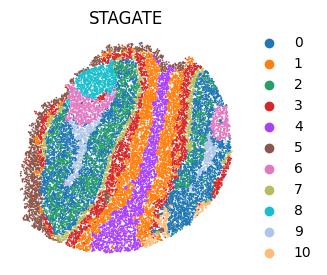

In [42]:
plt.rcParams["figure.figsize"] = (3, 3)
sc.pl.embedding(adata, basis="spatial", color="louvain",s=6, show=False, title='STAGATE')
plt.axis('off')

c:\Users\KARAN\anaconda3\envs\STAGATE_PT\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


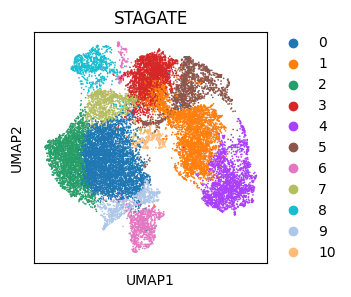

In [43]:
sc.pl.umap(adata, color='louvain', title='STAGATE')

### SCANPY results for comparison

In [44]:
sc.pp.pca(adata, n_comps=30)

In [45]:
sc.pp.neighbors(adata, use_rep='X_pca')
sc.tl.louvain(adata, resolution=0.5)
sc.tl.umap(adata)

c:\Users\KARAN\anaconda3\envs\STAGATE_PT\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


(-5108.555, -588.545, -5670.73, -847.6700000000001)

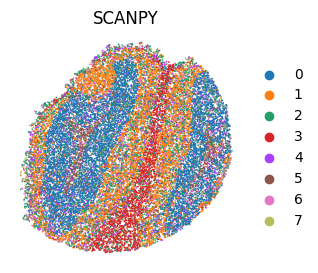

In [46]:
plt.rcParams["figure.figsize"] = (3, 3)
sc.pl.embedding(adata, basis="spatial", color="louvain",s=6, show=False, title='SCANPY')
plt.axis('off')

c:\Users\KARAN\anaconda3\envs\STAGATE_PT\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


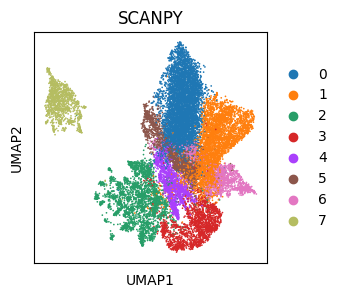

In [47]:
sc.pl.umap(adata, color='louvain', title='SCANPY')